# Functions

In [1]:
def compute_players_stats_all_matches(match, matches):
    p1 = match["server1"]
    p2 = match["server2"]
    
    serve_count = {}
    return_count = {}
    service_game_count = {}
    return_game_count = {}
    sets_count = {}
    tiebreaks_count = {}
    match_count = {}
    
    all_player_count = {}
    all_player_count["serves won"] = 0
    all_player_count["serves total"] = 0
    all_player_count["service games won"] = 0
    all_player_count["service games total"] = 0

    for index, match_ in matches.iterrows():
        player1 = match_["server1"]
        player2 = match_["server2"]
        
        if player1 not in serve_count:
            serve_count[player1] = [0,0]
            return_count[player1] = [0,0]
            service_game_count[player1] = [0,0]
            return_game_count[player1] = [0,0]
            sets_count[player1] = [0,0]
            tiebreaks_count[player1] = [0,0]
            match_count[player1] = 0
        if player2 not in serve_count:
            serve_count[player2] = [0,0]
            return_count[player2] = [0,0]
            service_game_count[player2] = [0,0]
            return_game_count[player2] = [0,0]
            sets_count[player2] = [0,0]
            tiebreaks_count[player2] = [0,0]
            match_count[player2] = 0
        
        serve_count[player1][0] += match_["p1 serves won"]
        serve_count[player2][0] += match_["p2 serves won"]
        serve_count[player1][1] += match_["p1 serves total"]
        serve_count[player2][1] += match_["p2 serves total"]
        all_player_count["serves won"] += match_["p1 serves won"] + match_["p2 serves won"]
        all_player_count["serves total"] += match_["p1 serves total"] + match_["p2 serves total"]


        return_count[player1][0] += match_["p2 serves total"] - match_["p2 serves won"]
        return_count[player2][0] += match_["p1 serves total"] - match_["p1 serves won"]
        return_count[player1][1] += match_["p2 serves total"]
        return_count[player2][1] += match_["p1 serves total"]

        
        service_game_count[player1][0] += match_["p1 service games won"]
        service_game_count[player2][0] += match_["p2 service games won"]
        service_game_count[player1][1] += match_["p1 service games total"]
        service_game_count[player2][1] += match_["p2 service games total"]
        all_player_count["service games won"] += match_["p1 service games won"] + match_["p2 service games won"]
        all_player_count["service games total"] += match_["p1 service games total"] + match_["p2 service games total"]

        
        return_game_count[player1][0] += match_["p2 service games total"] - match_["p2 service games won"]
        return_game_count[player2][0] += match_["p1 service games total"] - match_["p1 service games won"]
        return_game_count[player1][1] += match_["p2 service games total"]
        return_game_count[player2][1] += match_["p1 service games total"]

        
        sets_count[player1][0] += match_["p1 sets won"]
        sets_count[player2][0] += match_["p2 sets won"]
        sets_count[player1][1] += match_["sets total"]
        sets_count[player2][1] += match_["sets total"]

        
        tiebreaks_count[player1][0] += match_["p1 tiebreaks won"]
        tiebreaks_count[player2][0] += match_["p2 tiebreaks won"]
        tiebreaks_count[player1][1] += match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"]
        tiebreaks_count[player2][1] += match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"]

        
        match_count[player1] += 1
        match_count[player2] += 1
    
    
    return serve_count, return_count, service_game_count, return_game_count, sets_count, tiebreaks_count, match_count, all_player_count
    

In [2]:
def compute_variance_past_year_multiple_matches(match, relevant_matches, player, p):
    serve_variance_nn = 0
    return_variance_nn = 0
    service_game_variance_nn = 0
    return_game_variance_nn = 0
    sets_variance_nn = 0
    tiebreak_variance_nn = 0
    
    
    for index, match_ in relevant_matches.iterrows():
        player1 = match_["server1"]
        player2 = match_["server2"]
        
        tiebreaks_total = match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"]
        
        if player == player1:
            serve_variance_nn += (match_["p1 serves won"] - match_["p1 serves total"] * match[p + " serve win rate"])**2
            return_variance_nn += ((match_["p2 serves total"] - match_["p2 serves won"]) - match_["p2 serves total"] * match[p +" return win rate"])**2
            
            service_game_variance_nn += (match_["p1 service games won"] - match_["p1 service games total"] * match[p + " service game win rate"])**2
            return_game_variance_nn += ((match_["p2 service games total"] - match_["p2 service games won"]) - match_["p2 service games total"] * match[p + " return game win rate"])**2
            
            sets_variance_nn += (match_["p1 sets won"] - match_["sets total"] * match[p + " set win rate"])**2
            tiebreak_variance_nn += (match_["p1 tiebreaks won"] - tiebreaks_total * match["p1 tiebreak win rate"])**2
            
        if player == player2:
            serve_variance_nn += (match_["p2 serves won"] - match_["p2 serves total"] * match[p + " serve win rate"])**2
            return_variance_nn += ((match_["p1 serves total"] - match_["p1 serves won"]) - match_["p1 serves total"] * match[p + " return win rate"])**2
            
            service_game_variance_nn += (match_["p2 service games won"] - match_["p2 service games total"] * match[p + " service game win rate"])**2
            return_game_variance_nn += ((match_["p1 service games total"] - match_["p1 service games won"]) - match_["p1 service games total"] * match[p + " return game win rate"])**2
            
            sets_variance_nn += (match_["p2 sets won"] - match_["sets total"] * match[p + " set win rate"])**2
            tiebreak_variance_nn += (match_["p2 tiebreaks won"] - tiebreaks_total * match[p + " tiebreak win rate"])**2
            
    return serve_variance_nn, return_variance_nn, service_game_variance_nn, return_game_variance_nn, sets_variance_nn, tiebreak_variance_nn
    

In [3]:
def compute_variance_past_year_single_match(match, relevant_matches, player, p):
    serve_variance = 0
    return_variance = 0
    service_game_variance = 0
    return_game_variance = 0
    sets_variance = 0
    tiebreak_variance = 0
    
    for index, match_ in relevant_matches.iterrows():
        player1 = match_["server1"]
        player2 = match_["server2"]
        
        tiebreaks_total = match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"]
        
        if player == player1:
            if match_["p1 serves total"] < 2:
                serve_variance = float("nan")
            else:
                serve_variance = (match_["p1 serves won"] * (1 - match[p + " serve win rate"])**2 + (match_["p1 serves total"] - match_["p1 serves won"]) * (0 - match[p + " serve win rate"])**2) / (match_["p1 serves total"] - 1)
                
            if match_["p2 serves total"] < 2:
                return_variance = float("nan")
            else:
                return_variance = ((match_["p2 serves total"] - match_["p2 serves won"]) * (1 - match[p + " return win rate"])**2 + (match_["p2 serves won"]) * (0 - match[p + " return win rate"])**2) / (match_["p2 serves total"] - 1)
            
            if match_["p1 service games total"] < 2:
                service_game_variance = float("nan")
            else:
                service_game_variance = (match_["p1 service games won"] * (1 - match[p + " service game win rate"])**2 + (match_["p1 service games total"] - match_["p1 service games won"]) * (0 - match[p + " service game win rate"])**2) / (match_["p1 service games total"] - 1)
                
            if match_["p2 service games total"] < 2:
                return_game_variance = float("nan")
            else:
                return_game_variance = ((match_["p2 service games total"] - match_["p2 service games won"]) * (1 - match[p + " return game win rate"])**2 + (match_["p2 service games won"]) * (0 - match[p + " return game win rate"])**2) / (match_["p2 service games total"] - 1)
            
            if match_["sets total"] < 2:
                set_variance = float("nan")
            else:
                set_variance = (match_["p1 sets won"] * (1 - match[p + " set win rate"])**2 + (match_["sets total"] - match_["p1 sets won"]) * (0 - match[p + " set win rate"])**2) / (match_["sets total"] - 1)
            
            if tiebreaks_total < 2:
                tiebreak_variance = float("nan")
            else:
                tiebreak_variance = (match_["p1 tiebreaks won"] * (1 - match[p + " tiebreak win rate"])**2 + (tiebreaks_total - match_["p1 tiebreaks won"]) * (0 - match[p + " tiebreak win rate"])**2) / (tiebreaks_total - 1)
            
        if player == player2:
            if match_["p2 serves total"] < 2:
                serve_variance = float("nan")
            else:
                serve_variance = (match_["p2 serves won"] * (1 - match[p + " serve win rate"])**2 + (match_["p2 serves total"] - match_["p2 serves won"]) * (0 - match[p + " serve win rate"])**2) / (match_["p2 serves total"] - 1)
                
            if match_["p1 serves total"] < 2:
                return_variance = float("nan")
            else:
                return_variance = ((match_["p1 serves total"] - match_["p1 serves won"]) * (1 - match[p + " return win rate"])**2 + (match_["p1 serves won"]) * (0 - match[p + " return win rate"])**2) / (match_["p1 serves total"] - 1)
            
            if match_["p2 service games total"] < 2:
                service_game_vairance = float("nan")
            else:
                service_game_variance = (match_["p2 service games won"] * (1 - match[p + " service game win rate"])**2 + (match_["p2 service games total"] - match_["p2 service games won"]) * (0 - match[p + " service game win rate"])**2) / (match_["p2 service games total"] - 1)
                
            if match_["p1 service games total"] < 2:
                return_game_variance = float("nan")
            else:
                return_game_variance = ((match_["p1 service games total"] - match_["p1 service games won"]) * (1 - match[p + " return game win rate"])**2 + (match_["p1 service games won"]) * (0 - match[p + " return game win rate"])**2) / (match_["p1 service games total"] - 1)
            
            if match_["sets total"] < 2:
                sets_variance = float("nan")
            else:
                sets_variance = (match_["p2 sets won"] * (1 - match[p + " set win rate"])**2 + (match_["sets total"] - match_["p2 sets won"]) * (0 - match[p + " set win rate"])**2) / (match_["sets total"] - 1)
            
            if tiebreaks_total < 2:
                tiebreak_variance = float("nan")
            else:
                tiebreak_variance = (match_["p2 tiebreaks won"] * (1 - match[p + " tiebreak win rate"])**2 + (tiebreaks_total - match_["p2 tiebreaks won"]) * (0 - match[p + " tiebreak win rate"])**2) / (tiebreaks_total - 1)
            
    
    
    
    return serve_variance, return_variance, service_game_variance, return_game_variance, sets_variance, tiebreak_variance

In [4]:
def compute_variance_past_year(match, matches):
    p1 = match["server1"]
    p2 = match["server2"]
    date = match["date"]
    one_year_prior = date - relativedelta(years=1)
    
    p1_relevant_matches = matches[((matches["date"] < date) & (matches["date"] >= one_year_prior) & ((matches["server1"] == p1) | (matches["server2"] == p1)))]
    p2_relevant_matches = matches[((matches["date"] < date) & (matches["date"] >= one_year_prior) & ((matches["server1"] == p2) | (matches["server2"] == p2)))]
    
    if p1_relevant_matches.shape[0] == 1:
        p1_serve_var, p1_return_var, p1_service_game_var, p1_return_game_var, p1_sets_var, p1_tiebreaks_var = compute_variance_past_year_single_match(match, p1_relevant_matches, p1, "p1")
    elif p1_relevant_matches.shape[0] > 1:
        p1_serve_var, p1_return_var, p1_service_game_var, p1_return_game_var, p1_sets_var, p1_tiebreaks_var = compute_variance_past_year_multiple_matches(match, p1_relevant_matches, p1, "p1")
        p1_match_count = p1_relevant_matches.shape[0]
        
        if match["p1 year serve total"] == 0:
            pl_serve_var = float("nan")
        else:
            p1_serve_var = p1_serve_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year serve total"] / p1_match_count)**2)
        
        if match["p1 year return total"] == 0:
            p1_return_var = float("nan")
        else:
            p1_return_var = p1_return_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year return total"] / p1_match_count)**2)
        
        if match["p1 year service game total"] <= 2:
            p1_service_game_var = float("nan")
        else:
            p1_service_game_var = p1_service_game_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year service game total"] / p1_match_count)**2)
            
        if match["p1 year return game total"] <= 2:
            p1_return_game_var == float("nan")
        else:
            p1_return_game_var = p1_return_game_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year return game total"] / p1_match_count)**2)
        
        if match["p1 year set total"] <= 2:
            p1_sets_var = float("nan")
        else:
            p1_sets_var = p1_sets_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year set total"] / p1_match_count)**2)
        
        if match["p1 year tiebreak total"] <= 2:
            p1_tiebreaks_var = float("nan")
        else:
            p1_tiebreaks_var = p1_tiebreaks_var / ((p1_match_count) * (p1_match_count - 1) * (match["p1 year tiebreak total"] / p1_match_count)**2)
    else:
        p1_serve_var, p1_return_var, p1_service_game_var, p1_return_game_var, p1_sets_var, p1_tiebreaks_var = float("nan"), float("nan"), float("nan"), float("nan"), float("nan"), float("nan")
        
    if p2_relevant_matches.shape[0] == 1:
        p2_serve_var, p2_return_var, p2_service_game_var, p2_return_game_var, p2_sets_var, p2_tiebreaks_var = compute_variance_past_year_single_match(match, p2_relevant_matches, p2, "p2")
    elif p2_relevant_matches.shape[0] > 1:
        p2_serve_var, p2_return_var, p2_service_game_var, p2_return_game_var, p2_sets_var, p2_tiebreaks_var = compute_variance_past_year_multiple_matches(match, p2_relevant_matches, p2, "p2")
        p2_match_count = p2_relevant_matches.shape[0]
        
        if match["p2 year serve total"] == 0:
            p2_serve_var = float("nan")
        else:
            p2_serve_var = p2_serve_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year serve total"] / p2_match_count)**2)
            
        if match["p2 year return total"] == 0:
            p2_return_var = float("nan")
        else:
            p2_return_var = p2_return_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year return total"] / p2_match_count)**2)
            
        if match["p2 year service game total"] <= 2:
            p2_service_game_var = float("nan")
        else:
            p2_service_game_var = p2_service_game_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year service game total"] / p2_match_count)**2)
        
        if match["p2 year return game total"] <= 2:
            p2_return_game_var = float("nan")
        else:
            p2_return_game_var = p2_return_game_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year return game total"] / p2_match_count)**2)
        
        if match["p2 year set total"] <= 2:
            p2_sets_var = float("nan")
        else:
            p2_sets_var = p2_sets_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year set total"] / p2_match_count)**2)
        
        if match["p2 year tiebreak total"] <= 2:
            p2_tiebreaks_var = float("nan")
        else:
            p2_tiebreaks_var = p2_tiebreaks_var / ((p2_match_count) * (p2_match_count - 1) * (match["p2 year tiebreak total"] / p2_match_count)**2)
    else:
        p2_serve_var, p2_return_var, p2_service_game_var, p2_return_game_var, p2_sets_var, p2_tiebreaks_var = float("nan"), float("nan"), float("nan"), float("nan"), float("nan"), float("nan")
        
    return p1_serve_var, p1_return_var, p1_service_game_var, p1_return_game_var, p1_sets_var, p1_tiebreaks_var, p2_serve_var, p2_return_var, p2_service_game_var, p2_return_game_var, p2_sets_var, p2_tiebreaks_var
    
                                       

In [5]:
def compute_all_player_variance_past_year(match, matches):
    date = match["date"]
    one_year_prior = date - relativedelta(years=1)
    relevant_matches = matches[(matches["date"] < date) & (matches["date"] >= one_year_prior)]

    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count = compute_players_stats_all_matches(match, relevant_matches)
    
    serve_var = 0
    return_var = 0
    service_game_var = 0
    return_game_var = 0
    set_var = 0
    tiebreak_var = 0
    
    serve_year_total = []
    return_year_total = []
    service_game_year_total = []
    return_game_year_total = []
    set_year_total = []
    tiebreak_year_total = []
    
    for player in serve_count:
        
        if serve_count[player][1] > 0:
            serve_year_total.append(serve_count[player][1])
            serve_var += (serve_count[player][0] - serve_count[player][1] * match["all player year serve win rate"])**2
            
        if return_count[player][1] > 0:
            return_year_total.append(return_count[player][1])
            return_var += (return_count[player][0] - return_count[player][1] * (1 - match["all player year serve win rate"]))**2
            
        if service_game_count[player][1] > 0:
            service_game_year_total.append(service_game_count[player][1])
            service_game_var += (service_game_count[player][0] - service_game_count[player][1] * match["all player year service game win rate"])**2
            
        if return_game_count[player][1] > 0:
            return_game_year_total.append(return_game_count[player][1])
            return_game_var += (return_game_count[player][0] - return_game_count[player][1] * (1 - match["all player year service game win rate"]))**2
            
        if sets_count[player][1] > 0:
            set_year_total.append(sets_count[player][1])
            set_var += (sets_count[player][0] - sets_count[player][1] * 0.5)**2
            
        if tiebreaks_count[player][1] > 0:
            tiebreak_year_total.append(tiebreaks_count[player][1])
            tiebreak_var += (tiebreaks_count[player][0] - tiebreaks_count[player][1] * 0.5)**2
            
    if len(serve_year_total) > 1:
        serve_var = serve_var / ((len(serve_year_total)) * (len(serve_year_total) - 1) * (np.mean(serve_year_total)**2))
    else:
        serve_var = float("nan")
    
    if len(return_year_total) > 1:    
        return_var = return_var / ((len(return_year_total)) * (len(return_year_total) - 1) * (np.mean(return_year_total)**2))
    else:
        return_var = float("nan")
    
    if len(service_game_year_total) > 1:
        service_game_var = service_game_var / ((len(service_game_year_total)) * (len(service_game_year_total) - 1) * (np.mean(service_game_year_total)**2))
    else:
        service_game_var = float("nan")
    
    if len(return_game_year_total) > 1:
        return_game_var = return_game_var / ((len(return_game_year_total)) * (len(return_game_year_total) - 1) * (np.mean(return_game_year_total)**2))
    else:
        return_game_var = float("nan")
    
    if len(set_year_total) > 1:
        set_var = set_var / ((len(set_year_total)) * (len(set_year_total) - 1) * (np.mean(set_year_total)**2))
    else:
        set_var = float("nan")
    
    if len(tiebreak_year_total) > 1:
        tiebreak_var = tiebreak_var / ((len(tiebreak_year_total)) * (len(tiebreak_year_total) - 1) * (np.mean(tiebreak_year_total)**2))
    else:
        tiebreak_var = float("nan")
        
    return serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var
    
    
        
    

    
    
    

In [6]:
# Attempt at using clustering to compute A matrix
def compute_all_player_variance_past_year3(match, matches):
    date = match["date"]
    one_year_prior = date - relativedelta(years=1)
    relevant_matches = matches[(matches["date"] < date) & (matches["date"] >= one_year_prior)]

    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count = compute_players_stats_all_matches(match, relevant_matches)
    
    serve_var = 0
    return_var = 0
    service_game_var = 0
    return_game_var = 0
    set_var = 0
    tiebreak_var = 0
    
    serve_year_total = []
    return_year_total = []
    service_game_year_total = []
    return_game_year_total = []
    set_year_total = []
    tiebreak_year_total = []
    
    for player in serve_count:
        
        if serve_count[player][1] > 0:
            serve_year_total.append(serve_count[player][1])
            serve_var += (serve_count[player][0] - serve_count[player][1] * match["all player year serve win rate"])**2
            
        if return_count[player][1] > 0:
            return_year_total.append(return_count[player][1])
            return_var += (return_count[player][0] - return_count[player][1] * (1 - match["all player year serve win rate"]))**2
            
        if service_game_count[player][1] > 0:
            service_game_year_total.append(service_game_count[player][1])
            service_game_var += (service_game_count[player][0] - service_game_count[player][1] * match["all player year service game win rate"])**2
            
        if return_game_count[player][1] > 0:
            return_game_year_total.append(return_game_count[player][1])
            return_game_var += (return_game_count[player][0] - return_game_count[player][1] * (1 - match["all player year service game win rate"]))**2
            
        if sets_count[player][1] > 0:
            set_year_total.append(sets_count[player][1])
            set_var += (sets_count[player][0] - sets_count[player][1] * 0.5)**2
            
        if tiebreaks_count[player][1] > 0:
            tiebreak_year_total.append(tiebreaks_count[player][1])
            tiebreak_var += (tiebreaks_count[player][0] - tiebreaks_count[player][1] * 0.5)**2
            
    if len(serve_year_total) > 1:
        serve_var = serve_var / ((len(serve_year_total) - 1) * (np.mean(serve_year_total)**2))
    else:
        serve_var = float("nan")
    
    if len(return_year_total) > 1:    
        return_var = return_var / ((len(return_year_total) - 1) * (np.mean(return_year_total)**2))
    else:
        return_var = float("nan")
    
    if len(service_game_year_total) > 1:
        service_game_var = service_game_var / ((len(service_game_year_total) - 1) * (np.mean(service_game_year_total)**2))
    else:
        service_game_var = float("nan")
    
    if len(return_game_year_total) > 1:
        return_game_var = return_game_var / ((len(return_game_year_total) - 1) * (np.mean(return_game_year_total)**2))
    else:
        return_game_var = float("nan")
    
    if len(set_year_total) > 1:
        set_var = set_var / ((len(set_year_total) - 1) * (np.mean(set_year_total)**2))
    else:
        set_var = float("nan")
    
    if len(tiebreak_year_total) > 1:
        tiebreak_var = tiebreak_var / ((len(tiebreak_year_total) - 1) * (np.mean(tiebreak_year_total)**2))
    else:
        tiebreak_var = float("nan")
        
    return serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var
    
    
        
    

    

In [7]:
def compute_variance_past_year_simple(match):
    if match["p1 year serve total"] != 0:
        p1_sv = (match["all player year serve win rate"] * (1 - match["all player year serve win rate"])) / match["p1 year serve total"]
    else:
        p1_sv = float("nan")
    
    if match["p1 year return total"] != 0:
        p1_rv = (match["all player year serve win rate"] * (1 - match["all player year serve win rate"])) / match["p1 year return total"]
    else:
        p1_rv = float("nan")
        
    if match["p1 year service game total"] != 0:
        p1_sgv = (match["all player year service game win rate"] * (1 - match["all player year service game win rate"])) / match["p1 year service game total"]
    else:
        p1_sgv = float("nan")
        
    if match["p1 year return game total"] != 0:
        p1_rgv = (match["all player year service game win rate"] * (1 - match["all player year service game win rate"])) / match["p1 year return game total"]
    else:
        p1_rgv = float("nan")
        
    if match["p1 year set total"] != 0:
        p1_setv = (0.5)*(0.5) / match["p1 year set total"]
    else:
        p1_setv = float("nan")
        
    if match["p1 year tiebreak total"] != 0:
        p1_tv = (0.5)*(0.5) / match["p1 year tiebreak total"]
    else:
        p1_tv = float("nan")
        
    if match["p2 year serve total"] != 0:
        p2_sv = (match["all player year serve win rate"] * (1 - match["all player year serve win rate"])) / match["p2 year serve total"]
    else:
        p2_sv = float("nan")
        
    if match["p2 year return total"] != 0:
        p2_rv = (match["all player year serve win rate"] * (1 - match["all player year serve win rate"])) / match["p2 year return total"]
    else:
        p2_rv = float("nan")
        
    if match["p2 year service game total"]:
        p2_sgv = (match["all player year service game win rate"] * (1 - match["all player year service game win rate"])) / match["p2 year service game total"]
    else:
        p2_sgv = float("nan")
        
    if match["p2 year return game total"]:
        p2_rgv = (match["all player year service game win rate"] * (1 - match["all player year service game win rate"])) / match["p2 year return game total"]
    else:
        p2_rgv = float("nan")
       
    if match["p2 year set total"] != 0:
        p2_setv = (0.5)*(0.5) / match["p2 year set total"]
    else:
        p2_setv = float("nan")
        
    if match["p2 year tiebreak total"] != 0:
        p2_tv = (0.5)*(0.5) / match["p2 year tiebreak total"]
    else:
        p2_tv = float("nan")
    
    return p1_sv, p1_rv, p1_sgv, p1_rgv, p1_setv, p1_tv, p2_sv, p2_rv, p2_sgv, p2_rgv, p2_setv, p2_tv

In [8]:
def compute_all_player_variance_past_year_simple(match, matches):
    date = match["date"]
    one_year_prior = date - relativedelta(years=1)
    relevant_matches = matches[(matches["date"] < date) & (matches["date"] >= one_year_prior)]

    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count = compute_players_stats_all_matches(match, relevant_matches)
    
    serve_var = 0
    return_var = 0
    service_game_var = 0
    return_game_var = 0
    set_var = 0
    tiebreak_var = 0
    
    serve_year_total = []
    return_year_total = []
    service_game_year_total = []
    return_game_year_total = []
    set_year_total = []
    tiebreak_year_total = []
    
    for player in serve_count:
        
        if serve_count[player][1] > 0:
            serve_year_total.append(serve_count[player][1])
            serve_var += ((serve_count[player][0] / serve_count[player][1]) - match["all player year serve win rate"])**2
            
        if return_count[player][1] > 0:
            return_year_total.append(return_count[player][1])
            return_var += ((return_count[player][0] / return_count[player][1]) - (1 - match["all player year serve win rate"]))**2
            
        if service_game_count[player][1] > 0:
            service_game_year_total.append(service_game_count[player][1])
            service_game_var += ((service_game_count[player][0] / service_game_count[player][1]) - match["all player year service game win rate"])**2
            
        if return_game_count[player][1] > 0:
            return_game_year_total.append(return_game_count[player][1])
            return_game_var += ((return_game_count[player][0] / return_game_count[player][1]) - (1 - match["all player year service game win rate"]))**2
            
        if sets_count[player][1] > 0:
            set_year_total.append(sets_count[player][1])
            set_var += ((sets_count[player][0] / sets_count[player][1]) - 0.5)**2
            
        if tiebreaks_count[player][1] > 0:
            tiebreak_year_total.append(tiebreaks_count[player][1])
            tiebreak_var += ((tiebreaks_count[player][0] / tiebreaks_count[player][1]) - 0.5)**2
            
    if len(serve_year_total) > 1:
        serve_var = serve_var / (len(serve_year_total) - 1)
    else:
        serve_var = float("nan")
    
    if len(return_year_total) > 1:    
        return_var = return_var / (len(return_year_total) - 1)
    else:
        return_var = float("nan")
    
    if len(service_game_year_total) > 1:
        service_game_var = service_game_var / (len(service_game_year_total) - 1)
    else:
        service_game_var = float("nan")
    
    if len(return_game_year_total) > 1:
        return_game_var = return_game_var / (len(return_game_year_total) - 1)
    else:
        return_game_var = float("nan")
    
    if len(set_year_total) > 1:
        set_var = set_var / (len(set_year_total) - 1)
    else:
        set_var = float("nan")
    
    if len(tiebreak_year_total) > 1:
        tiebreak_var = tiebreak_var / (len(tiebreak_year_total) - 1)
    else:
        tiebreak_var = float("nan")
        
    return serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var

In [9]:
def compute_all_player_variance_past_year_no_recompute(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count, match):
    serve_var = 0
    return_var = 0
    service_game_var = 0
    return_game_var = 0
    set_var = 0
    tiebreak_var = 0
    
    serve_year_total = []
    return_year_total = []
    service_game_year_total = []
    return_game_year_total = []
    set_year_total = []
    tiebreak_year_total = []
    
    for player in serve_count:
        
        if serve_count[player][1] > 0:
            serve_year_total.append(serve_count[player][1])
            serve_var += ((serve_count[player][0] / serve_count[player][1]) - all_player_count["serve freq"])**2
            
        if return_count[player][1] > 0:
            return_year_total.append(return_count[player][1])
            return_var += ((return_count[player][0] / return_count[player][1]) - (1 - all_player_count["serve freq"]))**2
            
        if service_game_count[player][1] > 0:
            service_game_year_total.append(service_game_count[player][1])
            service_game_var += ((service_game_count[player][0] / service_game_count[player][1]) - all_player_count["service game freq"])**2
            
        if return_game_count[player][1] > 0:
            return_game_year_total.append(return_game_count[player][1])
            return_game_var += ((return_game_count[player][0] / return_game_count[player][1]) - (1 - all_player_count["service game freq"]))**2
            
        if sets_count[player][1] > 0:
            set_year_total.append(sets_count[player][1])
            set_var += ((sets_count[player][0] / sets_count[player][1]) - 0.5)**2
            
        if tiebreaks_count[player][1] > 0:
            tiebreak_year_total.append(tiebreaks_count[player][1])
            tiebreak_var += ((tiebreaks_count[player][0] / tiebreaks_count[player][1]) - 0.5)**2
            
    if len(serve_year_total) > 1:
        serve_var = serve_var / (len(serve_year_total) - 1)
    else:
        serve_var = float("nan")
    
    if len(return_year_total) > 1:    
        return_var = return_var / (len(return_year_total) - 1)
    else:
        return_var = float("nan")
    
    if len(service_game_year_total) > 1:
        service_game_var = service_game_var / (len(service_game_year_total) - 1)
    else:
        service_game_var = float("nan")
    
    if len(return_game_year_total) > 1:
        return_game_var = return_game_var / (len(return_game_year_total) - 1)
    else:
        return_game_var = float("nan")
    
    if len(set_year_total) > 1:
        set_var = set_var / (len(set_year_total) - 1)
    else:
        set_var = float("nan")
    
    if len(tiebreak_year_total) > 1:
        tiebreak_var = tiebreak_var / (len(tiebreak_year_total) - 1)
    else:
        tiebreak_var = float("nan")
        
    return serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var

In [10]:
def compute_matchup_stats_JS(match):
    s_itt = match["p1 tourney serve adv JS"]
    r_itt = match["p1 tourney return adv JS"]
    
    s_jtt = match["p2 tourney serve adv JS"]
    r_jtt = match["p2 tourney return adv JS"]
    
    sg_itt = match["p1 tourney service game adv JS"]
    rg_itt = match["p1 tourney return game adv JS"]
    
    sg_jtt = match["p2 tourney service game adv JS"]
    rg_jtt = match["p2 tourney return game adv JS"]
    
    sets_itt = match["p1 tourney set adv JS"]
    sets_jtt = match["p2 tourney set adv JS"]
    
    t_itt = match["p1 tourney tiebreak adv JS"]
    t_jtt = match["p2 tourney tiebreak adv JS"]
    
    # Pr[i wins serve on j at tournament t on day t]
    s_ijtt = (s_itt * (1 - r_jtt)) / ((s_itt * (1 - r_jtt)) + (r_jtt * (1 - s_itt)))
    # Pr[j wins serve on i at tournament t on day t]
    s_jitt = (s_jtt * (1 - r_itt)) / ((s_jtt * (1 - r_itt)) + (r_itt * (1 - s_jtt)))
    
    # Pr[i wins service game on j at tournament t on day t]
    sg_ijtt = (sg_itt * (1 - rg_jtt)) / ((sg_itt * (1 - rg_jtt)) + (rg_jtt * (1 - sg_itt)))
    # Pr[j wins service game on i at tournament t on day t]
    sg_jitt = (sg_jtt * (1 - rg_itt)) / ((sg_jtt * (1 - rg_itt)) + (rg_itt * (1 - sg_jtt)))
    
    # Pr[i wins set on j at tournament t on day t]
    sets_ijtt = (sets_itt * (1 - sets_jtt)) / ((sets_itt * (1 - sets_jtt)) + (sets_jtt * (1 - sets_itt)))
    
    # Pr[i wins tiebreak on j at tournament t on day t]
    t_ijtt = (t_itt * (1 - t_jtt)) / ((t_itt * (1 - t_jtt)) + (t_jtt * (1 - t_itt)))
    
    
    return s_ijtt, sg_ijtt, sets_ijtt, t_ijtt, s_jitt, sg_jitt

In [11]:
def compute_JSvalues_opp_values(match, matches):
    date = match["date"]
    one_year_prior = date - relativedelta(years=1)
    relevant_matches = matches[(matches["date"] < date) & (matches["date"] >= one_year_prior)]

    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count = compute_players_stats_all_matches(match, relevant_matches)
    
    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count = safely_append_frequency(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count)
    
    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count = safely_append_variance(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count)
    
    serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var = compute_all_player_variance_past_year_no_recompute(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count, match_count, all_player_count, match)
    
    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count = safely_append_Bvalues(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count, serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var)
    
    serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count = safely_append_JSvalues(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count)
    
    p1_data, p2_data = compute_opp_stats_for_match_JS(match, relevant_matches, serve_count, return_count, service_game_count, return_game_count, sets_count, tiebreaks_count)
    
    return p1_data["sc_opp"], p1_data["rc_opp"], p1_data["sgc_opp"], p1_data["rgc_opp"], p1_data["setsc_opp"], p1_data["tc_opp"], p2_data["sc_opp"], p2_data["rc_opp"], p2_data["sgc_opp"], p2_data["rgc_opp"], p2_data["setsc_opp"], p2_data["tc_opp"]
    

In [12]:
def safely_append_frequency(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count):
    for player in serve_count:
        if serve_count[player][1] != 0:
            serve_count[player].append(serve_count[player][0] / serve_count[player][1])
        else:
            serve_count[player].append(float("nan"))
            
        if return_count[player][1] != 0:
            return_count[player].append(return_count[player][0] / return_count[player][1])
        else:
            return_count[player].append(float("nan"))
            
        if service_game_count[player][1] != 0:
            service_game_count[player].append(service_game_count[player][0] / service_game_count[player][1])
        else:
            service_game_count[player].append(float("nan"))
            
        if return_game_count[player][1] != 0:
            return_game_count[player].append(return_game_count[player][0] / return_game_count[player][1])
        else:
            return_game_count[player].append(float("nan"))
            
        if sets_count[player][1] != 0:
            sets_count[player].append(sets_count[player][0] / sets_count[player][1])
        else:
            sets_count[player].append(float("nan"))
            
        if tiebreaks_count[player][1] != 0:
            tiebreaks_count[player].append(tiebreaks_count[player][0] / tiebreaks_count[player][1])
        else:
            tiebreaks_count[player].append(float("nan"))
            
    if all_player_count["serves total"] != 0:
        all_player_count["serve freq"] = all_player_count["serves won"] / all_player_count["serves total"]
    else:
        all_player_count["serve freq"] = float("nan")
        
        
    if all_player_count["service games total"] != 0:
        all_player_count["service game freq"] = all_player_count["service games won"] / all_player_count["service games total"]
    else:
        all_player_count["service game freq"] = float("nan")
        
    return serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count

In [13]:
def safely_append_variance(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count):
    for player in serve_count:
        if serve_count[player][1] != 0:
            serve_count[player].append(all_player_count["serve freq"] * (1 - all_player_count["serve freq"]) / serve_count[player][1])
        else:
            serve_count[player].append(float("nan"))
            
        if return_count[player][1] != 0:
            return_count[player].append(all_player_count["serve freq"] * (1 - all_player_count["serve freq"]) / return_count[player][1])
        else:
            return_count[player].append(float("nan"))
            
        if service_game_count[player][1] != 0:
            service_game_count[player].append(all_player_count["service game freq"] * (1 - all_player_count["service game freq"]) / service_game_count[player][1])
        else:
            service_game_count[player].append(float("nan"))
            
        if return_game_count[player][1] != 0:
            return_game_count[player].append(all_player_count["service game freq"] * (1 - all_player_count["service game freq"]) / return_game_count[player][1])
        else:
            return_game_count[player].append(float("nan"))
            
        if sets_count[player][1] != 0:
            sets_count[player].append(0.5 * (1 - 0.5) / sets_count[player][1]) # all player set win rate is 0.5 since each set that's won is also lost
        else:
            sets_count[player].append(float("nan"))
            
        if tiebreaks_count[player][1] != 0:
            tiebreaks_count[player].append(0.5 * (1 - 0.5) / tiebreaks_count[player][1]) # all player tiebreak win rate is 0.5 since each set that's won is also lost
        else:
            tiebreaks_count[player].append(float("nan"))
            
    return serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count

In [14]:
def safely_append_Bvalues(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count, serve_var, return_var, service_game_var, return_game_var, set_var, tiebreak_var):
    for player in serve_count:
        serve_count[player].append(serve_count[player][3] / (serve_count[player][3] + serve_var))
        return_count[player].append(return_count[player][3] / (return_count[player][3] + return_var))
        service_game_count[player].append(service_game_count[player][3] / (service_game_count[player][3] + service_game_var))
        return_game_count[player].append(return_game_count[player][3] / (return_game_count[player][3] + return_game_var))
        sets_count[player].append(sets_count[player][3] / (sets_count[player][3] + set_var))
        tiebreaks_count[player].append(tiebreaks_count[player][3] / (tiebreaks_count[player][3] + tiebreak_var))
    
    return serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count

In [15]:
def safely_append_JSvalues(serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count):
    for player in serve_count:
        serve_count[player].append(all_player_count["serve freq"] * serve_count[player][4] + serve_count[player][2] * (1 - serve_count[player][4]))
        return_count[player].append((1 - all_player_count["serve freq"]) * return_count[player][4] + return_count[player][2] * (1 - return_count[player][4]))
        service_game_count[player].append(all_player_count["service game freq"] * service_game_count[player][4] + service_game_count[player][2] * (1 - service_game_count[player][4]))
        return_game_count[player].append((1 - all_player_count["service game freq"]) * return_game_count[player][4] + return_game_count[player][2] * (1 - return_game_count[player][4]))
        sets_count[player].append(0.5 * sets_count[player][4] + sets_count[player][2] * (1 - sets_count[player][4]))
        tiebreaks_count[player].append(0.5 * tiebreaks_count[player][4] + tiebreaks_count[player][2] * (1 - tiebreaks_count[player][4]))
        
    return serve_count,return_count,service_game_count,return_game_count,sets_count,tiebreaks_count,all_player_count

In [16]:
def compute_opp_stats_for_match_JS(match, matches, sc, rc, sgc, rgc, setsc, tc):
    p1 = match["server1"]
    p2 = match["server2"]
    players = {p1, p2}
    
    # serve_count_opp, return_count_opp
    sc_opp = {p1:0, p2:0}
    rc_opp = {p1:0, p2:0}
    
    # service_game_count_opp, return_game_count_opp
    sgc_opp = {p1:0, p2:0}
    rgc_opp = {p1:0, p2:0}
    
    # sets_count_opp, tiebreak_count_opp
    setsc_opp = {p1:0, p2:0}
    tc_opp = {p1:0, p2:0}
    
    for index, match_ in matches.iterrows():
        player1 = match_["server1"]
        player2 = match_["server2"]
        if player1 not in players and player2 not in players:
            continue
        
        if player1 not in sc_opp:
            sc_opp[player1] = 0
            rc_opp[player1] = 0
            sgc_opp[player1] = 0
            rgc_opp[player1] = 0
            setsc_opp[player1] = 0
            tc_opp[player1] = 0
        if player2 not in sc_opp:
            sc_opp[player2] = 0
            rc_opp[player2] = 0
            sgc_opp[player2] = 0
            rgc_opp[player2] = 0
            setsc_opp[player2] = 0
            tc_opp[player2] = 0
        
        if sc[player2][1] != 0:
            sc_opp[player1] += (sc[player2][5]) * match_["p1 serves total"]
        if sc[player1][1] != 0:
            sc_opp[player2] += (sc[player1][5]) * match_["p2 serves total"]
            
        if rc[player2][1] != 0:
            rc_opp[player1] += (rc[player2][5]) * match_["p1 serves total"]
        if rc[player1][1] != 0:
            rc_opp[player2] += (rc[player1][5]) * match_["p2 serves total"]
        
        if sgc[player2][1] != 0:
            sgc_opp[player1] += (sgc[player2][5]) * match_["p1 service games total"]
        if sgc[player1][1] != 0:
            sgc_opp[player2] += (sgc[player1][5]) * match_["p2 service games total"]
            
        if rgc[player2][1] != 0:
            rgc_opp[player1] += (rgc[player2][5]) * match_["p1 service games total"]
        if rgc[player1][1] != 0:
            rgc_opp[player2] += (rgc[player1][5]) * match_["p2 service games total"]
            
        if setsc[player2][1] != 0:
            setsc_opp[player1] += (setsc[player2][5]) * match_["sets total"]
        if setsc[player1][1] != 0:
            setsc_opp[player2] += (setsc[player1][5]) * match_["sets total"]
        
        if tc[player2][1] != 0:
            tc_opp[player1] += (tc[player2][5]) * (match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"])
        if tc[player1][1] != 0:
            tc_opp[player2] += (tc[player1][5]) * (match_["p1 tiebreaks won"] + match_["p2 tiebreaks won"])
        
    for player in [p1, p2]:
        if sc[player][1] != 0:
            sc_opp[player] = sc_opp[player] / sc[player][1]
        else:
            sc_opp[player] = float("nan")
        
        if sc[player][1] != 0 and rc[player][1] != 0:
            rc_opp[player] = rc_opp[player] / rc[player][1]
        else:
            rc_opp[player] = float("nan")
            
        if sc[player][1] != 0 and sgc[player][1] > 0:
            sgc_opp[player] = sgc_opp[player] / sgc[player][1]
        else:
            sgc_opp[player] = float("nan")
        
        if sc[player][1] != 0 and rgc[player][1] > 0:
            rgc_opp[player] = rgc_opp[player] / rgc[player][1]
        else:
            rgc_opp[player] = float("nan")
        
        if sc[player][1] != 0 and setsc[player][1] > 0:
            setsc_opp[player] = setsc_opp[player] / setsc[player][1]
        else:
            setsc_opp[player] = float("nan")
        
        if sc[player][1] != 0 and tc[player][1] > 0:
            tc_opp[player] = tc_opp[player] / tc[player][1]
        else:
            tc_opp[player] = float("nan")
    
    p1_data = {
        "sc_opp": sc_opp[p1],
        "rc_opp": rc_opp[p1],
        "sgc_opp": sgc_opp[p1],
        "rgc_opp": rgc_opp[p1],
        "setsc_opp": setsc_opp[p1],
        "tc_opp": tc_opp[p1]
    }
    p2_data = {
        "sc_opp": sc_opp[p2],
        "rc_opp": rc_opp[p2],
        "sgc_opp": sgc_opp[p2],
        "rgc_opp": rgc_opp[p2],
        "setsc_opp": setsc_opp[p2],
        "tc_opp": tc_opp[p2]
    }

    return p1_data, p2_data

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
pd.set_option("display.max_columns", None)

In [18]:
matches = pd.read_csv("./data/2011-2015_matches_cleaned_forShrinkage.csv")
matches["date"] = matches.apply(lambda x: datetime.strptime(x["date"], '%Y-%m-%d'), axis=1)
matches

,pbp_id,date,tny_name,tour,draw,server1,server2,winner,pbp,score,adf_flag,wh_minutes,p1 serves won,p1 serves total,p1 service games won,p1 service games total,p1 sets won,p1 tiebreaks won,p2 serves won,p2 serves total,p2 service games won,p2 service games total,p2 sets won,p2 tiebreaks won,sets total,tourney serves won,tourney serves total,tourney service games won,tourney service games total,p1 serve win rate,p1 return win rate,p1 service game win rate,p1 return game win rate,p1 set win rate,p1 tiebreak win rate,p2 serve win rate,p2 return win rate,p2 service game win rate,p2 return game win rate,p2 set win rate,p2 tiebreak win rate,p1 opp serve win rate,p1 opp return win rate,p1 opp service game win rate,p1 opp return game win rate,p1 opp set win rate,p1 opp tiebreak win rate,p2 opp serve win rate,p2 opp return win rate,p2 opp service game win rate,p2 opp return game win rate,p2 opp set win rate,p2 opp tiebreak win rate,p1 match count,p2 match count,all player year serve win rate,all player year service game win rate,p1 year serve total,p1 year return total,p1 year service game total,p1 year return game total,p1 year set total,p1 year tiebreak total,p2 year serve total,p2 year return total,p2 year service game total,p2 year return game total,p2 year set total,p2 year tiebreak total,p1 year match win rate,p2 year match rate,p1 year match results,p2 year match results,p1 opp match win rate,p2 opp match win rate
0,2231275,2011-07-28,ATPStu,ATP,Main,Olivier Rochus,Fabio Fognini,2,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,6-4 6-1,0,66,27,58,3,9,0,0,32,56,6,8,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2231276,2011-07-28,ATPStu,ATP,Main,Robin Haase,Marin Cilic,2,SSRSS;RRSSRSSS;SSSS;RSSSS;SRSRSS;RSRSRSSS;RSRS...,4-6 6-4 6-3,0,141,60,102,11,15,1,0,60,92,12,14,2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2231342,2011-07-28,Farmer,ATP,Main,Alejandro Falla,Thomaz Bellucci,2,SRRSSRSRRSRSRSRSRSRR;SSSRS;RRSRR;SRSSS;RRSSRR;...,6-0 6-1,0,42,21,55,1,7,0,0,26,37,6,6,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,2229262,2011-07-28,Credit,ATP,Main,Matthias Bachinger,Julien Benneteau,2,SSSS;SSSS;RRRR;SSSS;SSSS;SRRRSSRSSRRSSRSS;SSSS...,6-4 6-4,0,57,36,59,7,10,0,0,43,58,9,10,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,2228887,2011-07-28,Credit,ATP,Main,Stan Wawrinka,Peter Luczak,1,SSSS;RRSSSS;SRSSRS;RRSSSS;SSSRS;SSSRRS;RSSSS;R...,6-3 7-5,0,82,43,58,10,11,2,0,34,61,7,10,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,8628374,2015-12-18,Men'sAustralianOpenWildCardPlayoff,ATP,Main,James Duckworth,Marinko Matosevic,1,SSSS;RSRSRSSS;SSSS;RSSRSS;SRSRRSRR;SRRRSSRR;SS...,4-6 6-3 7-6(7) 7-6(8),0,199,103,154,18,22,3,2,93,146,17,21,1,0,4,564.0,879.0,112.0,147.0,0.635690,0.335260,0.792208,0.169935,0.477612,0.500000,0.575717,0.348559,0.685345,0.188034,0.301887,0.142857,0.625203,0.364778,0.758255,0.178435,0.414046,0.454246,0.629896,0.374191,0.766704,0.191251,0.436469,0.379723,21,19,0.641567,0.797852,2023,1903,308,306,67,20,1499,1423,232,234,53,7,0.210526,0.575717,WWLWLWLWLWWLLWLWLLLLW,LLWLLWL

In [19]:
# compute sets needed to win match (to use later in row filtering for evaluation)
# Computing sets needed to win the match
matches["tourney sets to win"] = matches[["p1 sets won", "p2 sets won"]].max(axis=1)

In [20]:
# Calculate tournament averages
matches["tourney serve win rate"] = matches["tourney serves won"] / matches["tourney serves total"]
matches["tourney return win rate"] = 1 - matches["tourney serve win rate"]
matches["tourney service game win rate"] = matches["tourney service games won"] / matches["tourney service games total"]
matches["tourney return game win rate"] = 1 - matches["tourney service game win rate"]

In [21]:
# Compute variance for average of each player for each of the match categories (D_i) using clustering
p1_var_cols = ["p1 serve win rate variance", "p1 return win rate variance", "p1 service game win rate variance", "p1 return game win rate variance", "p1 set win rate variance", "p1 tiebreak win rate variance"]
p2_var_cols = ["p2 serve win rate variance", "p2 return win rate variance", "p2 service game win rate variance", "p2 return game win rate variance", "p2 set win rate variance", "p2 tiebreak win rate variance"]
var_cols = p1_var_cols + p2_var_cols
matches[var_cols] = matches.apply(lambda match: compute_variance_past_year(match, matches), axis=1, result_type="expand")




In [22]:
# Compute variance for average of each category across all players using clustering (A)
var_cols = ["all player serve win rate variance", "all player return win rate variance", "all player service game win rate variance", "all player return game win rate variance", "all player set win rate variance", "all player tiebreak win rate variance"]
matches[var_cols] = matches.apply(lambda match: compute_all_player_variance_past_year(match, matches), axis=1, result_type="expand")

In [23]:
matches

,pbp_id,date,tny_name,tour,draw,server1,server2,winner,pbp,score,adf_flag,wh_minutes,p1 serves won,p1 serves total,p1 service games won,p1 service games total,p1 sets won,p1 tiebreaks won,p2 serves won,p2 serves total,p2 service games won,p2 service games total,p2 sets won,p2 tiebreaks won,sets total,tourney serves won,tourney serves total,tourney service games won,tourney service games total,p1 serve win rate,p1 return win rate,p1 service game win rate,p1 return game win rate,p1 set win rate,p1 tiebreak win rate,p2 serve win rate,p2 return win rate,p2 service game win rate,p2 return game win rate,p2 set win rate,p2 tiebreak win rate,p1 opp serve win rate,p1 opp return win rate,p1 opp service game win rate,p1 opp return game win rate,p1 opp set win rate,p1 opp tiebreak win rate,p2 opp serve win rate,p2 opp return win rate,p2 opp service game win rate,p2 opp return game win rate,p2 opp set win rate,p2 opp tiebreak win rate,p1 match count,p2 match count,all player year serve win rate,all player year service game win rate,p1 year serve total,p1 year return total,p1 year service game total,p1 year return game total,p1 year set total,p1 year tiebreak total,p2 year serve total,p2 year return total,p2 year service game total,p2 year return game total,p2 year set total,p2 year tiebreak total,p1 year match win rate,p2 year match rate,p1 year match results,p2 year match results,p1 opp match win rate,p2 opp match win rate,tourney sets to win,tourney serve win rate,tourney return win rate,tourney service game win rate,tourney return game win rate,p1 serve win rate variance,p1 return win rate variance,p1 service game win rate variance,p1 return game win rate variance,p1 set win rate variance,p1 tiebreak win rate variance,p2 serve win rate variance,p2 return win rate variance,p2 service game win rate variance,p2 return game win rate variance,p2 set win rate variance,p2 tiebreak win rate variance,all player serve win rate variance,all player return win rate variance,all player service game win rate variance,all player return game win rate variance,all player set win rate variance,all player tiebreak win rate variance
0,2231275,2011-07-28,ATPStu,ATP,Main,Olivier Rochus,Fabio Fognini,2,SSSS;RRRR;SSRRSS;SSRRSS;RSRSRSRR;SSRSS;RSRRSR;...,6-4 6-1,0,66,27,58,3,9,0,0,32,56,6,8,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2231276,2011-07-28,ATPStu,ATP,Main,Robin Haase,Marin Cilic,2,SSRSS;RRSSRSSS;SSSS;RSSSS;SRSRSS;RSRSRSSS;RSRS...,4-6 6-4 6-3,0,141,60,102,11,15,1,0,60,92,12,14,2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2231342,2011-07-28,Farmer,ATP,Main,Alejandro Falla,Thomaz Bellucci,2,SRRSSRSRRSRSRSRSRSRR;SSSRS;RRSRR;SRSSS;RRSSRR;...,6-0 6-1,0,42,21,55,1,7,0,0,26,37,6,6,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2229262,2011-07-28,Credit,ATP,Main,Matthias Bachinger,Julien Benneteau,2,SSSS;SSSS;RRRR;SSSS;SSSS;SRRRSSRSSRRSSRSS;SSSS...,6-4 6-4,0,57,36,59,7,10,0,0,43,58,9,10,2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,2,2,2,2,0,0,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2228887,2011-07-28,Credit,ATP,Main,Stan Wawrinka,Peter Luczak,1,SSSS;RRSSSS;SRSSRS;RRSSSS;SSSRS;SSSRRS;RSSSS;R...,6-3 7-5,0,82,43,58,10,11,2,0,34,61,

<AxesSubplot:xlabel='p1 year set total', ylabel='p1 set win rate variance'>

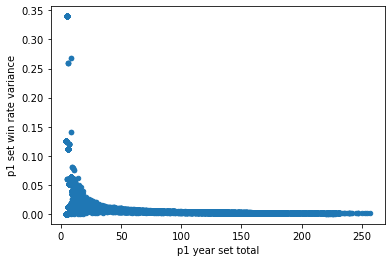

In [24]:
matches.plot.scatter(x="p1 year set total", y="p1 set win rate variance")

In [25]:
# compute variance for each of the match categories using variance all players and dividing by number of attempts
p1_var_cols = ["p1 serve win rate variance2", "p1 return win rate variance2", "p1 service game win rate variance2", "p1 return game win rate variance2", "p1 set win rate variance2", "p1 tiebreak win rate variance2"]
p2_var_cols = ["p2 serve win rate variance2", "p2 return win rate variance2", "p2 service game win rate variance2", "p2 return game win rate variance2", "p2 set win rate variance2", "p2 tiebreak win rate variance2"]
var_cols = p1_var_cols + p2_var_cols
matches[var_cols] = matches.apply(lambda match: compute_variance_past_year_simple(match), axis=1, result_type="expand")

In [26]:
# Compute variance for average of each category across all players using simple approach where I find the squared deviation of each player's frequency from the average.
var_cols = ["all player serve win rate variance2", "all player return win rate variance2", "all player service game win rate variance2", "all player return game win rate variance2", "all player set win rate variance2", "all player tiebreak win rate variance2"]
matches[var_cols] = matches.apply(lambda match: compute_all_player_variance_past_year_simple(match, matches), axis=1, result_type="expand")

In [27]:
# Compute variance for average of each category across all players using clustering (A)
var_cols = ["all player serve win rate variance3", "all player return win rate variance3", "all player service game win rate variance3", "all player return game win rate variance3", "all player set win rate variance3", "all player tiebreak win rate variance3"]
matches[var_cols] = matches.apply(lambda match: compute_all_player_variance_past_year3(match, matches), axis=1, result_type="expand")

# Compute shrinkage factors

In [29]:
# Compute B1 values based on clustered variances
matches["p1 B serve"] = matches["p1 serve win rate variance"] / (matches["p1 serve win rate variance"] + matches["all player serve win rate variance3"])
matches["p1 B return"] = matches["p1 return win rate variance"] / (matches["p1 return win rate variance"] + matches["all player return win rate variance3"])
matches["p1 B service game"] = matches["p1 service game win rate variance"] / (matches["p1 service game win rate variance"] + matches["all player service game win rate variance3"])
matches["p1 B return game"] = matches["p1 return game win rate variance"] / (matches["p1 return game win rate variance"] + matches["all player return game win rate variance3"])
matches["p1 B set"] = matches["p1 set win rate variance"] / (matches["p1 set win rate variance"] + matches["all player set win rate variance3"])
matches["p1 B tiebreak"] = matches["p1 tiebreak win rate variance"] / (matches["p1 tiebreak win rate variance"] + matches["all player tiebreak win rate variance3"])

matches["p2 B serve"] = matches["p2 serve win rate variance"] / (matches["p2 serve win rate variance"] + matches["all player serve win rate variance3"])
matches["p2 B return"] = matches["p2 return win rate variance"] / (matches["p2 return win rate variance"] + matches["all player return win rate variance3"])
matches["p2 B service game"] = matches["p2 service game win rate variance"] / (matches["p2 service game win rate variance"] + matches["all player service game win rate variance3"])
matches["p2 B return game"] = matches["p2 return game win rate variance"] / (matches["p2 return game win rate variance"] + matches["all player return game win rate variance3"])
matches["p2 B set"] = matches["p2 set win rate variance"] / (matches["p2 set win rate variance"] + matches["all player set win rate variance3"])
matches["p2 B tiebreak"] = matches["p2 tiebreak win rate variance"] / (matches["p2 tiebreak win rate variance"] + matches["all player tiebreak win rate variance3"])

In [30]:
# Compute B2 values based on simple variances
matches["p1 B serve2"] = matches["p1 serve win rate variance2"] / (matches["p1 serve win rate variance2"] + matches["all player serve win rate variance3"])
matches["p1 B return2"] = matches["p1 return win rate variance2"] / (matches["p1 return win rate variance2"] + matches["all player return win rate variance3"])
matches["p1 B service game2"] = matches["p1 service game win rate variance2"] / (matches["p1 service game win rate variance2"] + matches["all player service game win rate variance3"])
matches["p1 B return game2"] = matches["p1 return game win rate variance2"] / (matches["p1 return game win rate variance2"] + matches["all player return game win rate variance3"])
matches["p1 B set2"] = matches["p1 set win rate variance2"] / (matches["p1 set win rate variance2"] + matches["all player set win rate variance3"])
matches["p1 B tiebreak2"] = matches["p1 tiebreak win rate variance2"] / (matches["p1 tiebreak win rate variance2"] + matches["all player tiebreak win rate variance3"])

matches["p2 B serve2"] = matches["p2 serve win rate variance2"] / (matches["p2 serve win rate variance2"] + matches["all player serve win rate variance3"])
matches["p2 B return2"] = matches["p2 return win rate variance2"] / (matches["p2 return win rate variance2"] + matches["all player return win rate variance3"])
matches["p2 B service game2"] = matches["p2 service game win rate variance2"] / (matches["p2 service game win rate variance2"] + matches["all player service game win rate variance3"])
matches["p2 B return game2"] = matches["p2 return game win rate variance2"] / (matches["p2 return game win rate variance2"] + matches["all player return game win rate variance3"])
matches["p2 B set2"] = matches["p2 set win rate variance2"] / (matches["p2 set win rate variance2"] + matches["all player set win rate variance3"])
matches["p2 B tiebreak2"] = matches["p2 tiebreak win rate variance2"] / (matches["p2 tiebreak win rate variance2"] + matches["all player tiebreak win rate variance3"])

In [31]:
# Compute B3 values based on simple variances
matches["p1 B serve3"] = matches["p1 serve win rate variance2"] / (matches["p1 serve win rate variance2"] + matches["all player serve win rate variance2"])
matches["p1 B return3"] = matches["p1 return win rate variance2"] / (matches["p1 return win rate variance2"] + matches["all player return win rate variance2"])
matches["p1 B service game3"] = matches["p1 service game win rate variance2"] / (matches["p1 service game win rate variance2"] + matches["all player service game win rate variance2"])
matches["p1 B return game3"] = matches["p1 return game win rate variance2"] / (matches["p1 return game win rate variance2"] + matches["all player return game win rate variance2"])
matches["p1 B set3"] = matches["p1 set win rate variance2"] / (matches["p1 set win rate variance2"] + matches["all player set win rate variance2"])
matches["p1 B tiebreak3"] = matches["p1 tiebreak win rate variance2"] / (matches["p1 tiebreak win rate variance2"] + matches["all player tiebreak win rate variance2"])

matches["p2 B serve3"] = matches["p2 serve win rate variance2"] / (matches["p2 serve win rate variance2"] + matches["all player serve win rate variance2"])
matches["p2 B return3"] = matches["p2 return win rate variance2"] / (matches["p2 return win rate variance2"] + matches["all player return win rate variance2"])
matches["p2 B service game3"] = matches["p2 service game win rate variance2"] / (matches["p2 service game win rate variance2"] + matches["all player service game win rate variance2"])
matches["p2 B return game3"] = matches["p2 return game win rate variance2"] / (matches["p2 return game win rate variance2"] + matches["all player return game win rate variance2"])
matches["p2 B set3"] = matches["p2 set win rate variance2"] / (matches["p2 set win rate variance2"] + matches["all player set win rate variance2"])
matches["p2 B tiebreak3"] = matches["p2 tiebreak win rate variance2"] / (matches["p2 tiebreak win rate variance2"] + matches["all player tiebreak win rate variance2"])

# Read CSV so that you don't need to run cells above

In [ ]:
matches = pd.read_csv("./data/JS_shrinkage.csv")
matches["date"] = matches.apply(lambda x: datetime.strptime(x["date"], '%Y-%m-%d'), axis=1)

# James-Stein Estimator: variance (3,1), ie., B1

In [245]:
# calculate shrunken values
matches["p1 serve win rate JS"] = matches["p1 serve win rate"] * (1 - matches["p1 B serve"]) + matches["all player year serve win rate"] * matches["p1 B serve"]
matches["p1 return win rate JS"] = matches["p1 return win rate"] * (1 - matches["p1 B return"]) + (1- matches["all player year serve win rate"]) * matches["p1 B return"]
matches["p1 service game win rate JS"] = matches["p1 service game win rate"] * (1 - matches["p1 B service game"]) + matches["all player year service game win rate"] * matches["p1 B service game"]
matches["p1 return game win rate JS"] = matches["p1 return game win rate"] * (1 - matches["p1 B return game"]) + (1 - matches["all player year service game win rate"]) * matches["p1 B return game"]
matches["p1 set win rate JS"] = matches["p1 set win rate"] * (1 - matches["p1 B set"]) + (0.5) * matches["p1 B set"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p1 tiebreak win rate JS"] = matches["p1 tiebreak win rate"] * (1 - matches["p1 B tiebreak"]) + (0.5) * matches["p1 B tiebreak"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

matches["p2 serve win rate JS"] = matches["p2 serve win rate"] * (1 - matches["p2 B serve"]) + matches["all player year serve win rate"] * matches["p2 B serve"]
matches["p2 return win rate JS"] = matches["p2 return win rate"] * (1 - matches["p2 B return"]) + (1- matches["all player year serve win rate"]) * matches["p2 B return"]
matches["p2 service game win rate JS"] = matches["p2 service game win rate"] * (1 - matches["p2 B service game"]) + matches["all player year service game win rate"] * matches["p2 B service game"]
matches["p2 return game win rate JS"] = matches["p2 return game win rate"] * (1 - matches["p2 B return game"]) + (1 - matches["all player year service game win rate"]) * matches["p2 B return game"]
matches["p2 set win rate JS"] = matches["p2 set win rate"] * (1 - matches["p2 B set"]) + (0.5) * matches["p2 B set"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p2 tiebreak win rate JS"] = matches["p2 tiebreak win rate"] * (1 - matches["p2 B tiebreak"]) + (0.5) * matches["p2 B tiebreak"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

In [246]:
# calculate no sos adjust p1 serve_tt, pl_service_game_tt, etc.
matches["p1 serve_tt JS no sos adjust"] = (matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) / ((matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) + (matches["p2 return win rate JS"] * (1 - matches["p1 serve win rate JS"])))
matches["p2 serve_tt JS no sos adjust"] = (matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) / ((matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) + (matches["p1 return win rate JS"] * (1 - matches["p2 serve win rate JS"])))

matches["p1 service_game_tt JS no sos adjust"] = (matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) / ((matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) + (matches["p2 return game win rate JS"] * (1 - matches["p1 service game win rate JS"])))
matches["p2 service_game_tt JS no sos adjust"] = (matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) / ((matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) + (matches["p1 return game win rate JS"] * (1 - matches["p2 service game win rate JS"])))

matches["p1 tiebreak_tt JS no sos adjust"] = (matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) / ((matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) + (matches["p2 tiebreak win rate JS"] * (1 - matches["p1 tiebreak win rate JS"])))

matches["p1 set_tt JS no sos adjust"] = (matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) / ((matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) + (matches["p2 set win rate JS"] * (1 - matches["p1 set win rate JS"])))



In [247]:
# Generate relative abilities JS, we use unshrunken opp stats (allows a possibility for improvement)
matches["p1 relative serve JS"] = matches["p1 serve win rate JS"] - (1 - matches["p1 opp return win rate"])
matches["p2 relative serve JS"] = matches["p2 serve win rate JS"] - (1 - matches["p2 opp return win rate"])

matches["p1 relative return JS"] = matches["p1 return win rate JS"] - (1 - matches["p1 opp serve win rate"])
matches["p2 relative return JS"] = matches["p2 return win rate JS"] - (1 - matches["p2 opp serve win rate"])

matches["p1 relative service games JS"] = matches["p1 service game win rate JS"] - (1 - matches["p1 opp return game win rate"])
matches["p2 relative service games JS"] = matches["p2 service game win rate JS"] - (1 - matches["p2 opp return game win rate"])

matches["p1 relative return games JS"] = matches["p1 return game win rate JS"] - (1 - matches["p1 opp service game win rate"])
matches["p2 relative return games JS"] = matches["p2 return game win rate JS"] - (1 - matches["p2 opp service game win rate"])

matches["p1 relative set JS"] = matches["p1 set win rate JS"] - (1 - matches["p1 opp set win rate"])
matches["p2 relative set JS"] = matches["p2 set win rate JS"] - (1 - matches["p2 opp set win rate"])

matches["p1 relative tiebreak JS"] = matches["p1 tiebreak win rate JS"] - (1 - matches["p1 opp tiebreak win rate"])
matches["p2 relative tiebreak JS"] = matches["p2 tiebreak win rate JS"] - (1 - matches["p2 opp tiebreak win rate"])


In [248]:
# Computing player-tournament stats
matches["p1 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p1 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p1 relative return JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p2 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p2 relative return JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p1 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p1 relative return games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p2 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p2 relative return games JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney set adv JS"] = (0.5 + matches["p1 relative set JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney set adv JS"] = (0.5 + matches["p2 relative set JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney tiebreak adv JS"] = (0.5 + matches["p1 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney tiebreak adv JS"] = (0.5 + matches["p2 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)

In [249]:
# Computing matchup statistics
matchup_cols = ["p1 serve_tt", "p1 service_game_tt", "p1 set_tt", "p1 tiebreak_tt", "p2 serve_tt", "p2 service_game_tt"]
matches[matchup_cols] = matches.apply(lambda match: compute_matchup_stats_JS(match), axis=1, result_type="expand")

In [250]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

### Predict using $s_{ijtt}$ and $r_{ijtt}$

In [251]:
# Remove rows where we don't have s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [252]:
# import the markov model functions lazily
%run Modeling_tennis_match_iid_points.ipynb

0.7019
0.933378


In [253]:
# compute Pr[p1 wins] with opponent/ tournament adjusted shrunken serve values
games_after_2012["p1 pr win"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [254]:
# compute Pr[p1 wins] with non sos adjusted JS serve rates
games_after_2012["p1 pr win JS no sos adjust"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)


In [255]:
# compute log loss
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win", "p1 pr win JS no sos adjust"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win"]) + (1-m["winner"])*np.log(1 - m["p1 pr win"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6171395662983634
No sos adjust log loss: 0.6167586105250995
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Predict using $sg_{ijtt}$ and $rg_{ijtt}$ and $t_{ijtt}$

In [256]:
# Filter matches we want to predict on
# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [257]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 tiebreak_tt'].notna())]



In [258]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 tiebreak_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 tiebreak_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [259]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust game based", "p1 pr win JS no sos adjust game based"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust game based"])), axis=1)
compute_lloss["lloss JS no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust game based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss JS no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6159549755511167
No sos adjust log loss: 0.6302746761596693
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict games using $sets_{ijtt}$ values

In [260]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [261]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 set_tt'].notna())]

In [262]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [263]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust set based", "p1 pr win JS no sos adjust set based"]]

compute_lloss["lloss opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust set based"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust set based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss opp adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Opp adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Opp adjust log loss: 0.6075101836733168
No sos adjust log loss: 0.6130628383422767
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [264]:
matches[["p1 set win rate", "p2 set win rate", "p1 set win rate JS","p2 set win rate JS","p1 set_tt JS no sos adjust", "p1 set_tt"]].describe()







,p1 set win rate,p2 set win rate,p1 set win rate JS,p2 set win rate JS,p1 set_tt JS no sos adjust,p1 set_tt
count,10347.000000,10322.000000,10347.000000,10322.000000,10018.000000,10018.000000
mean,0.527216,0.512587,0.528296,0.514493,0.513614,0.518701
std,0.128091,0.123993,0.115310,0.109985,0.137725,0.177980
min,0.117647,0.083333,0.141398,0.100212,0.059859,0.000913
25%,0.446429,0.437500,0.455428,0.446009,0.421450,0.400214
50%,0.518182,0.504587,0.516067,0.504293,0.515054,0.519395
75%,0.608696,0.580000,0.599464,0.571624,0.605876,0.640378
max,0.944444,0.923077,0.941829,0.915292,0.939072,0.999194


### Try to predict using $sg_{ijtt}$ for games and $s_{ijtt}, s_{jitt}$ for tiebreaks

In [265]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [266]:
# Remove rows where we don't have sg_ijtt and s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [267]:
# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)






In [268]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust mix", "p1 pr win JS no sos adjust mix"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust mix"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust mix"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6053720321217162
No sos adjust log loss: 0.6163979019604483
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# James-Stein Estimator: variance (3,2), ie., B2

In [269]:
# calculate shrunken values
matches["p1 serve win rate JS"] = matches["p1 serve win rate"] * (1 - matches["p1 B serve2"]) + matches["all player year serve win rate"] * matches["p1 B serve2"]
matches["p1 return win rate JS"] = matches["p1 return win rate"] * (1 - matches["p1 B return2"]) + (1- matches["all player year serve win rate"]) * matches["p1 B return2"]
matches["p1 service game win rate JS"] = matches["p1 service game win rate"] * (1 - matches["p1 B service game2"]) + matches["all player year service game win rate"] * matches["p1 B service game2"]
matches["p1 return game win rate JS"] = matches["p1 return game win rate"] * (1 - matches["p1 B return game2"]) + (1 - matches["all player year service game win rate"]) * matches["p1 B return game2"]
matches["p1 set win rate JS"] = matches["p1 set win rate"] * (1 - matches["p1 B set2"]) + (0.5) * matches["p1 B set2"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p1 tiebreak win rate JS"] = matches["p1 tiebreak win rate"] * (1 - matches["p1 B tiebreak2"]) + (0.5) * matches["p1 B tiebreak2"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

matches["p2 serve win rate JS"] = matches["p2 serve win rate"] * (1 - matches["p2 B serve2"]) + matches["all player year serve win rate"] * matches["p2 B serve2"]
matches["p2 return win rate JS"] = matches["p2 return win rate"] * (1 - matches["p2 B return2"]) + (1- matches["all player year serve win rate"]) * matches["p2 B return2"]
matches["p2 service game win rate JS"] = matches["p2 service game win rate"] * (1 - matches["p2 B service game2"]) + matches["all player year service game win rate"] * matches["p2 B service game2"]
matches["p2 return game win rate JS"] = matches["p2 return game win rate"] * (1 - matches["p2 B return game2"]) + (1 - matches["all player year service game win rate"]) * matches["p2 B return game2"]
matches["p2 set win rate JS"] = matches["p2 set win rate"] * (1 - matches["p2 B set2"]) + (0.5) * matches["p2 B set2"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p2 tiebreak win rate JS"] = matches["p2 tiebreak win rate"] * (1 - matches["p2 B tiebreak2"]) + (0.5) * matches["p2 B tiebreak2"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

In [270]:
# calculate no sos adjust p1 serve_tt, pl_service_game_tt, etc.
matches["p1 serve_tt JS no sos adjust"] = (matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) / ((matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) + (matches["p2 return win rate JS"] * (1 - matches["p1 serve win rate JS"])))
matches["p2 serve_tt JS no sos adjust"] = (matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) / ((matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) + (matches["p1 return win rate JS"] * (1 - matches["p2 serve win rate JS"])))

matches["p1 service_game_tt JS no sos adjust"] = (matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) / ((matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) + (matches["p2 return game win rate JS"] * (1 - matches["p1 service game win rate JS"])))
matches["p2 service_game_tt JS no sos adjust"] = (matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) / ((matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) + (matches["p1 return game win rate JS"] * (1 - matches["p2 service game win rate JS"])))

matches["p1 tiebreak_tt JS no sos adjust"] = (matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) / ((matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) + (matches["p2 tiebreak win rate JS"] * (1 - matches["p1 tiebreak win rate JS"])))

matches["p1 set_tt JS no sos adjust"] = (matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) / ((matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) + (matches["p2 set win rate JS"] * (1 - matches["p1 set win rate JS"])))



In [271]:
# Generate relative abilities JS, we use unshrunken opp stats (allows a possibility for improvement)
matches["p1 relative serve JS"] = matches["p1 serve win rate JS"] - (1 - matches["p1 opp return win rate"])
matches["p2 relative serve JS"] = matches["p2 serve win rate JS"] - (1 - matches["p2 opp return win rate"])

matches["p1 relative return JS"] = matches["p1 return win rate JS"] - (1 - matches["p1 opp serve win rate"])
matches["p2 relative return JS"] = matches["p2 return win rate JS"] - (1 - matches["p2 opp serve win rate"])

matches["p1 relative service games JS"] = matches["p1 service game win rate JS"] - (1 - matches["p1 opp return game win rate"])
matches["p2 relative service games JS"] = matches["p2 service game win rate JS"] - (1 - matches["p2 opp return game win rate"])

matches["p1 relative return games JS"] = matches["p1 return game win rate JS"] - (1 - matches["p1 opp service game win rate"])
matches["p2 relative return games JS"] = matches["p2 return game win rate JS"] - (1 - matches["p2 opp service game win rate"])

matches["p1 relative set JS"] = matches["p1 set win rate JS"] - (1 - matches["p1 opp set win rate"])
matches["p2 relative set JS"] = matches["p2 set win rate JS"] - (1 - matches["p2 opp set win rate"])

matches["p1 relative tiebreak JS"] = matches["p1 tiebreak win rate JS"] - (1 - matches["p1 opp tiebreak win rate"])
matches["p2 relative tiebreak JS"] = matches["p2 tiebreak win rate JS"] - (1 - matches["p2 opp tiebreak win rate"])

In [272]:
# Computing player-tournament stats
matches["p1 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p1 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p1 relative return JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p2 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p2 relative return JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p1 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p1 relative return games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p2 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p2 relative return games JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney set adv JS"] = (0.5 + matches["p1 relative set JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney set adv JS"] = (0.5 + matches["p2 relative set JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney tiebreak adv JS"] = (0.5 + matches["p1 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney tiebreak adv JS"] = (0.5 + matches["p2 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)

In [273]:
# Computing matchup statistics
matchup_cols = ["p1 serve_tt", "p1 service_game_tt", "p1 set_tt", "p1 tiebreak_tt", "p2 serve_tt", "p2 service_game_tt"]
matches[matchup_cols] = matches.apply(lambda match: compute_matchup_stats_JS(match), axis=1, result_type="expand")

In [274]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

### Predict using $s_{ijtt}$ and $r_{ijtt}$

In [275]:
# Remove rows where we don't have s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [276]:
# compute Pr[p1 wins] with opponent/ tournament adjusted shrunken serve values
games_after_2012["p1 pr win"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [277]:
# compute Pr[p1 wins] with non sos adjusted JS serve rates
games_after_2012["p1 pr win JS no sos adjust"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)


In [278]:
# compute log loss
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win", "p1 pr win JS no sos adjust"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win"]) + (1-m["winner"])*np.log(1 - m["p1 pr win"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6159901232621163
No sos adjust log loss: 0.6157326041532398
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Predict using $sg_{ijtt}$ and $rg_{ijtt}$ and $t_{ijtt}$

In [279]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [280]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 tiebreak_tt'].notna())]


In [281]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 tiebreak_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 tiebreak_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [282]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust game based", "p1 pr win JS no sos adjust game based"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust game based"])), axis=1)
compute_lloss["lloss JS no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust game based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss JS no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6125431651114488
No sos adjust log loss: 0.6295678312744792
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict games using $sets_{ijtt}$ values

In [283]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [284]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 set_tt'].notna())]

In [285]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [286]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust set based", "p1 pr win JS no sos adjust set based"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust set based"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust set based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6008964774004852
No sos adjust log loss: 0.6106343404168
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict using $sg_{ijtt}$ for games and $s_{ijtt}, s_{jitt}$ for tiebreaks

In [287]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [288]:
# Remove rows where we don't have sg_ijtt and s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [289]:
# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)






In [290]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust mix", "p1 pr win JS no sos adjust mix"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust mix"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust mix"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6041931281883354
No sos adjust log loss: 0.6149326558038993
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# James-Stein Estimator: variance (2,2), ie., B3

In [223]:
# calculate shrunken values
matches["p1 serve win rate JS"] = matches["p1 serve win rate"] * (1 - matches["p1 B serve3"]) + matches["all player year serve win rate"] * matches["p1 B serve3"]
matches["p1 return win rate JS"] = matches["p1 return win rate"] * (1 - matches["p1 B return3"]) + (1- matches["all player year serve win rate"]) * matches["p1 B return3"]
matches["p1 service game win rate JS"] = matches["p1 service game win rate"] * (1 - matches["p1 B service game3"]) + matches["all player year service game win rate"] * matches["p1 B service game3"]
matches["p1 return game win rate JS"] = matches["p1 return game win rate"] * (1 - matches["p1 B return game3"]) + (1 - matches["all player year service game win rate"]) * matches["p1 B return game3"]
matches["p1 set win rate JS"] = matches["p1 set win rate"] * (1 - matches["p1 B set3"]) + (0.5) * matches["p1 B set3"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p1 tiebreak win rate JS"] = matches["p1 tiebreak win rate"] * (1 - matches["p1 B tiebreak3"]) + (0.5) * matches["p1 B tiebreak3"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

matches["p2 serve win rate JS"] = matches["p2 serve win rate"] * (1 - matches["p2 B serve3"]) + matches["all player year serve win rate"] * matches["p2 B serve3"]
matches["p2 return win rate JS"] = matches["p2 return win rate"] * (1 - matches["p2 B return3"]) + (1- matches["all player year serve win rate"]) * matches["p2 B return3"]
matches["p2 service game win rate JS"] = matches["p2 service game win rate"] * (1 - matches["p2 B service game3"]) + matches["all player year service game win rate"] * matches["p2 B service game3"]
matches["p2 return game win rate JS"] = matches["p2 return game win rate"] * (1 - matches["p2 B return game3"]) + (1 - matches["all player year service game win rate"]) * matches["p2 B return game3"]
matches["p2 set win rate JS"] = matches["p2 set win rate"] * (1 - matches["p2 B set3"]) + (0.5) * matches["p2 B set3"] # while the column doesn't exist, matches["all player year set win rate"] = 0.5 since every set that's won by one player is lost by another
matches["p2 tiebreak win rate JS"] = matches["p2 tiebreak win rate"] * (1 - matches["p2 B tiebreak3"]) + (0.5) * matches["p2 B tiebreak3"] # while the column doesn't exist, matches["all player year tiebreak win rate"] = 0.5 since every tiebreak that's won by one player is lost by another

In [224]:
# calculate no sos adjust p1 serve_tt, pl_service_game_tt, etc.
matches["p1 serve_tt JS no sos adjust"] = (matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) / ((matches["p1 serve win rate JS"] * (1 - matches["p2 return win rate JS"])) + (matches["p2 return win rate JS"] * (1 - matches["p1 serve win rate JS"])))
matches["p2 serve_tt JS no sos adjust"] = (matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) / ((matches["p2 serve win rate JS"] * (1 - matches["p1 return win rate JS"])) + (matches["p1 return win rate JS"] * (1 - matches["p2 serve win rate JS"])))

matches["p1 service_game_tt JS no sos adjust"] = (matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) / ((matches["p1 service game win rate JS"] * (1 - matches["p2 return game win rate JS"])) + (matches["p2 return game win rate JS"] * (1 - matches["p1 service game win rate JS"])))
matches["p2 service_game_tt JS no sos adjust"] = (matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) / ((matches["p2 service game win rate JS"] * (1 - matches["p1 return game win rate JS"])) + (matches["p1 return game win rate JS"] * (1 - matches["p2 service game win rate JS"])))

matches["p1 tiebreak_tt JS no sos adjust"] = (matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) / ((matches["p1 tiebreak win rate JS"] * (1 - matches["p2 tiebreak win rate JS"])) + (matches["p2 tiebreak win rate JS"] * (1 - matches["p1 tiebreak win rate JS"])))

matches["p1 set_tt JS no sos adjust"] = (matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) / ((matches["p1 set win rate JS"] * (1 - matches["p2 set win rate JS"])) + (matches["p2 set win rate JS"] * (1 - matches["p1 set win rate JS"])))




In [225]:
# Generate relative abilities JS, we use unshrunken opp stats (allows a possibility for improvement)
matches["p1 relative serve JS"] = matches["p1 serve win rate JS"] - (1 - matches["p1 opp return win rate"])
matches["p2 relative serve JS"] = matches["p2 serve win rate JS"] - (1 - matches["p2 opp return win rate"])

matches["p1 relative return JS"] = matches["p1 return win rate JS"] - (1 - matches["p1 opp serve win rate"])
matches["p2 relative return JS"] = matches["p2 return win rate JS"] - (1 - matches["p2 opp serve win rate"])

matches["p1 relative service games JS"] = matches["p1 service game win rate JS"] - (1 - matches["p1 opp return game win rate"])
matches["p2 relative service games JS"] = matches["p2 service game win rate JS"] - (1 - matches["p2 opp return game win rate"])

matches["p1 relative return games JS"] = matches["p1 return game win rate JS"] - (1 - matches["p1 opp service game win rate"])
matches["p2 relative return games JS"] = matches["p2 return game win rate JS"] - (1 - matches["p2 opp service game win rate"])

matches["p1 relative set JS"] = matches["p1 set win rate JS"] - (1 - matches["p1 opp set win rate"])
matches["p2 relative set JS"] = matches["p2 set win rate JS"] - (1 - matches["p2 opp set win rate"])

matches["p1 relative tiebreak JS"] = matches["p1 tiebreak win rate JS"] - (1 - matches["p1 opp tiebreak win rate"])
matches["p2 relative tiebreak JS"] = matches["p2 tiebreak win rate JS"] - (1 - matches["p2 opp tiebreak win rate"])

In [226]:
# Computing player-tournament stats
matches["p1 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p1 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p1 relative return JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p2 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p2 relative return JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p1 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p1 relative return games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p2 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p2 relative return games JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney set adv JS"] = (0.5 + matches["p1 relative set JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney set adv JS"] = (0.5 + matches["p2 relative set JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney tiebreak adv JS"] = (0.5 + matches["p1 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney tiebreak adv JS"] = (0.5 + matches["p2 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)

In [227]:
# Computing matchup statistics
matchup_cols = ["p1 serve_tt", "p1 service_game_tt", "p1 set_tt", "p1 tiebreak_tt", "p2 serve_tt", "p2 service_game_tt"]
matches[matchup_cols] = matches.apply(lambda match: compute_matchup_stats_JS(match), axis=1, result_type="expand")

In [228]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

### Predict using $s_{ijtt}$ and $r_{ijtt}$

In [229]:
# Remove rows where we don't have s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [230]:
# compute Pr[p1 wins] with opponent/ tournament adjusted shrunken serve values
games_after_2012["p1 pr win"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [231]:
# compute Pr[p1 wins] with non sos adjusted JS serve rates
games_after_2012["p1 pr win JS no sos adjust"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)


In [232]:
# compute log loss
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win", "p1 pr win JS no sos adjust"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win"]) + (1-m["winner"])*np.log(1 - m["p1 pr win"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6158652342943893
No sos adjust log loss: 0.6157626849592056
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Predict using $sg_{ijtt}$ and $rg_{ijtt}$ and $t_{ijtt}$

In [233]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [234]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 tiebreak_tt'].notna())]

In [235]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 tiebreak_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 tiebreak_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [236]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust game based", "p1 pr win JS no sos adjust game based"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust game based"])), axis=1)
compute_lloss["lloss JS no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust game based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss JS no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6133352540022577
No sos adjust log loss: 0.6286907941486217
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict games using $sets_{ijtt}$ values

In [237]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [238]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 set_tt'].notna())]

In [239]:

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)




In [240]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust set based", "p1 pr win JS no sos adjust set based"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust set based"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust set based"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6042246666075224
No sos adjust log loss: 0.6114597614736106
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict using $sg_{ijtt}$ for games and $s_{ijtt}, s_{jitt}$ for tiebreaks

In [241]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [242]:
# Remove rows where we don't have sg_ijtt and s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [243]:
# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win JS no sos adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt JS no sos adjust"], match["p2 service_game_tt JS no sos adjust"], match["p1 serve_tt JS no sos adjust"], match["p2 serve_tt JS no sos adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)






In [244]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust mix", "p1 pr win JS no sos adjust mix"]]

compute_lloss["lloss sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust mix"])), axis=1)
compute_lloss["lloss no sos adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win JS no sos adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win JS no sos adjust mix"])), axis=1)
N = compute_lloss.shape[0]

lloss_sos_adjust = (compute_lloss["lloss sos adjust"].sum()) * (-1/N)
lloss_no_sos_adjust = (compute_lloss["lloss no sos adjust"].sum()) * (-1/N)

print(f"Sos adjust log loss: {lloss_sos_adjust}")
print(f"No sos adjust log loss: {lloss_no_sos_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Sos adjust log loss: 0.6042897671887077
No sos adjust log loss: 0.6146892571573623
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Try to recompute opps using shrunken values and a pooled JS approach to calculate B

In [97]:
p1_opp_cols = ["p1 opp serve win rate JS", "p1 opp return win rate JS", "p1 opp service game win rate JS", "p1 opp return game win rate JS", "p1 opp set win rate JS", "p1 opp tiebreak win rate JS"]
p2_opp_cols = ["p2 opp serve win rate JS", "p2 opp return win rate JS", "p2 opp service game win rate JS", "p2 opp return game win rate JS", "p2 opp set win rate JS", "p2 opp tiebreak win rate JS"]
opp_cols = p1_opp_cols + p2_opp_cols
matches[opp_cols] = games_after_2012.apply(lambda match: compute_JSvalues_opp_values(match, matches), axis=1, result_type="expand")


In [98]:
# Generate relative abilities JS, we use unshrunken opp stats (allows a possibility for improvement)
matches["p1 relative serve JS"] = matches["p1 serve win rate JS"] - (1 - matches["p1 opp return win rate JS"])
matches["p2 relative serve JS"] = matches["p2 serve win rate JS"] - (1 - matches["p2 opp return win rate JS"])

matches["p1 relative return JS"] = matches["p1 return win rate JS"] - (1 - matches["p1 opp serve win rate JS"])
matches["p2 relative return JS"] = matches["p2 return win rate JS"] - (1 - matches["p2 opp serve win rate JS"])

matches["p1 relative service games JS"] = matches["p1 service game win rate JS"] - (1 - matches["p1 opp return game win rate JS"])
matches["p2 relative service games JS"] = matches["p2 service game win rate JS"] - (1 - matches["p2 opp return game win rate JS"])

matches["p1 relative return games JS"] = matches["p1 return game win rate JS"] - (1 - matches["p1 opp service game win rate JS"])
matches["p2 relative return games JS"] = matches["p2 return game win rate JS"] - (1 - matches["p2 opp service game win rate JS"])

matches["p1 relative set JS"] = matches["p1 set win rate JS"] - (1 - matches["p1 opp set win rate JS"])
matches["p2 relative set JS"] = matches["p2 set win rate JS"] - (1 - matches["p2 opp set win rate JS"])

matches["p1 relative tiebreak JS"] = matches["p1 tiebreak win rate JS"] - (1 - matches["p1 opp tiebreak win rate JS"])
matches["p2 relative tiebreak JS"] = matches["p2 tiebreak win rate JS"] - (1 - matches["p2 opp tiebreak win rate JS"])

In [99]:
# Computing player-tournament stats
matches["p1 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p1 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p1 relative return JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney serve adv JS"] = (matches["tourney serve win rate"] + matches["p2 relative serve JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return adv JS"] = (matches["tourney return win rate"] + matches["p2 relative return JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p1 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p1 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p1 relative return games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney service game adv JS"] = (matches["tourney service game win rate"] + matches["p2 relative service games JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney return game adv JS"] = (matches["tourney return game win rate"] + matches["p2 relative return games JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney set adv JS"] = (0.5 + matches["p1 relative set JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney set adv JS"] = (0.5 + matches["p2 relative set JS"]).clip(upper=0.9985, lower=0.0015)

matches["p1 tourney tiebreak adv JS"] = (0.5 + matches["p1 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)
matches["p2 tourney tiebreak adv JS"] = (0.5 + matches["p2 relative tiebreak JS"]).clip(upper=0.9985, lower=0.0015)

In [100]:
# Computing matchup statistics
matchup_cols = ["p1 serve_tt", "p1 service_game_tt", "p1 set_tt", "p1 tiebreak_tt", "p2 serve_tt", "p2 service_game_tt"]
matches[matchup_cols] = matches.apply(lambda match: compute_matchup_stats_JS(match), axis=1, result_type="expand")

In [101]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

### Predict using $s_{ijtt}$ and $r_{ijtt}$

In [102]:
# Remove rows where we don't have s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [103]:
# compute Pr[p1 wins] with opponent/ tournament adjusted shrunken serve values
games_after_2012["p1 pr win"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)

In [104]:
# compute Pr[p1 wins] with non opponent adjusted serve rates
games_after_2012["p1 pr win no opp adjust"] = games_after_2012.apply(lambda match: match_driver(2, 6, 4, 7, 1, match["p1 serve win rate"], match["p2 serve win rate"]), axis=1).clip(upper=0.9985, lower=0.0015)

In [105]:
# compute log loss
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win", "p1 pr win no opp adjust"]]

compute_lloss["lloss opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win"]) + (1-m["winner"])*np.log(1 - m["p1 pr win"])), axis=1)
compute_lloss["lloss no opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win no opp adjust"]) + (1-m["winner"])*np.log(1 - m["p1 pr win no opp adjust"])), axis=1)
N = compute_lloss.shape[0]

lloss_opp_adjust = (compute_lloss["lloss opp adjust"].sum()) * (-1/N)
lloss_no_opp_adjust = (compute_lloss["lloss no opp adjust"].sum()) * (-1/N)

print(f"Opp adjust log loss: {lloss_opp_adjust}")
print(f"No opp adjust log loss: {lloss_no_opp_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Opp adjust log loss: 0.6165064688996215
No opp adjust log loss: 0.6710734162349723
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Predict using $sg_{ijtt}$ and $rg_{ijtt}$ and $t_{ijtt}$

In [106]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [107]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 tiebreak_tt'].notna())]

In [108]:
# Compute tiebreak feature I forgot to compute for prediction
games_after_2012["p1 tiebreak no opp adjust"] = (games_after_2012["p1 tiebreak win rate"] * (1 - games_after_2012["p2 tiebreak win rate"])) / ((games_after_2012["p1 tiebreak win rate"] * (1 - games_after_2012["p2 tiebreak win rate"])) + (games_after_2012["p2 tiebreak win rate"] * (1 - games_after_2012["p1 tiebreak win rate"])))

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 tiebreak_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win no opp adjust game based"] = games_after_2012.apply(lambda match: match_driver_game_based(2, 6, 4, 7, 1, match["p1 service game win rate"], match["p2 service game win rate"], match["p1 tiebreak no opp adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)


In [109]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust game based", "p1 pr win no opp adjust game based"]]

compute_lloss["lloss opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust game based"])), axis=1)
compute_lloss["lloss no opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win no opp adjust game based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win no opp adjust game based"])), axis=1)
N = compute_lloss.shape[0]

lloss_opp_adjust = (compute_lloss["lloss opp adjust"].sum()) * (-1/N)
lloss_no_opp_adjust = (compute_lloss["lloss no opp adjust"].sum()) * (-1/N)

print(f"Opp adjust log loss: {lloss_opp_adjust}")
print(f"No opp adjust log loss: {lloss_no_opp_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")


Opp adjust log loss: 0.6155286074175514
No opp adjust log loss: 0.6677066551647721
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict games using $sets_{ijtt}$ values

In [110]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [111]:
# Remove rows where we don't have sg_ijtt and t_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 set_tt'].notna())]

In [112]:
# Compute set feature I forgot to compute for prediction
games_after_2012["p1 set no opp adjust"] = (games_after_2012["p1 set win rate"] * (1 - games_after_2012["p2 set win rate"])) / ((games_after_2012["p1 set win rate"] * (1 - games_after_2012["p2 set win rate"])) + (games_after_2012["p2 set win rate"] * (1 - games_after_2012["p1 set win rate"])))

# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win no opp adjust set based"] = games_after_2012.apply(lambda match: match_driver_set_based(2, match["p1 set no opp adjust"]), axis=1).clip(upper=0.9985, lower=0.0015)

In [113]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust set based", "p1 pr win no opp adjust set based"]]

compute_lloss["lloss opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust set based"])), axis=1)
compute_lloss["lloss no opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win no opp adjust set based"]) + (1-m["winner"])*np.log(1 - m["p1 pr win no opp adjust set based"])), axis=1)
N = compute_lloss.shape[0]

lloss_opp_adjust = (compute_lloss["lloss opp adjust"].sum()) * (-1/N)
lloss_no_opp_adjust = (compute_lloss["lloss no opp adjust"].sum()) * (-1/N)

print(f"Opp adjust log loss: {lloss_opp_adjust}")
print(f"No opp adjust log loss: {lloss_no_opp_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Opp adjust log loss: 0.5973754704904465
No opp adjust log loss: 0.6114466953806549
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Try to predict using $sg_{ijtt}$ for games and $s_{ijtt}, s_{jitt}$ for tiebreaks

In [114]:
# Filter matches we want to predict on

# Only consider matches on or after August 1, 2012, because we've had one year of data at that point
games_after_2012 = matches[matches["date"] > datetime.strptime("31 Dec 14", '%d %b %y')]

# Only consider best of three set matches
games_after_2012 = games_after_2012[games_after_2012["tourney sets to win"] == 2]

# Don't consider Davis Cup matches because they don't have a final set tiebreak
games_after_2012 = games_after_2012[games_after_2012["tny_name"] != "DavisC"]

# Remove rows where either player hasn't played at least 10 matches in the past year
games_after_2012 = games_after_2012[(games_after_2012["p1 match count"] >= 2) & (games_after_2012["p2 match count"] >= 2)]

In [115]:
# Remove rows where we don't have sg_ijtt and s_ijtt values to predict the result of the match
games_after_2012 = games_after_2012[(games_after_2012['p1 service_game_tt'].notna()) & (games_after_2012['p2 service_game_tt'].notna()) & (games_after_2012['p1 serve_tt'].notna()) & (games_after_2012['p2 serve_tt'].notna())]

In [116]:
# compute Pr[p1 wins] with non opponenent/ tournament adjusted service game values
games_after_2012["p1 pr win opp adjust mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service_game_tt"], match["p2 service_game_tt"], match["p1 serve_tt"], match["p2 serve_tt"]), axis=1).clip(upper=0.9985, lower=0.0015)
games_after_2012["p1 pr win no opp mix"] = games_after_2012.apply(lambda match: match_driver_game_based_tiebreak_serve_based(2, 6, 4, 7, 1, match["p1 service game win rate"], match["p2 service game win rate"], match["p1 serve win rate"], match["p2 serve win rate"]), axis=1).clip(upper=0.9985, lower=0.0015)

In [117]:
games_after_2012["winner"] = games_after_2012["winner"].replace(2,0)

compute_lloss = games_after_2012[["winner", "p1 pr win opp adjust mix", "p1 pr win no opp mix"]]

compute_lloss["lloss opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win opp adjust mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win opp adjust mix"])), axis=1)
compute_lloss["lloss no opp adjust"] = compute_lloss.apply(lambda m: (m["winner"]*np.log(m["p1 pr win no opp mix"]) + (1-m["winner"])*np.log(1 - m["p1 pr win no opp mix"])), axis=1)
N = compute_lloss.shape[0]

lloss_opp_adjust = (compute_lloss["lloss opp adjust"].sum()) * (-1/N)
lloss_no_opp_adjust = (compute_lloss["lloss no opp adjust"].sum()) * (-1/N)

print(f"Opp adjust log loss: {lloss_opp_adjust}")
print(f"No opp adjust log loss: {lloss_no_opp_adjust}")
print(f"Random guessing log loss: {-np.log(0.5)}")

Opp adjust log loss: 0.6065394821130111
No opp adjust log loss: 0.6716090167985113
Random guessing log loss: 0.6931471805599453


/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/VillasBoas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
print(len(games_after_2012))

1747


In [297]:
matches[["all player serve win rate variance", "all player serve win rate variance2", "all player serve win rate variance3", "p1 B serve", "p1 B serve2", "p1 B serve3"]].describe()

,all player serve win rate variance,all player serve win rate variance2,all player serve win rate variance3,p1 B serve,p1 B serve2,p1 B serve3
count,10801.000000,10801.000000,10801.000000,10308.000000,10308.000000,10308.000000
mean,0.000012,0.006449,0.003899,0.099738,0.057198,0.040497
std,0.000018,0.001830,0.000687,0.186639,0.091350,0.072228
min,0.000007,0.003819,0.002917,0.000032,0.006548,0.003574
25%,0.000009,0.005164,0.003454,0.024861,0.014782,0.008943
50%,0.000010,0.005665,0.003682,0.037890,0.021678,0.013767
75%,0.000011,0.008063,0.004409,0.077058,0.049954,0.032594
max,0.000434,0.010029,0.008386,0.988593,0.685526,0.555059


# Include only matches where each player in the match has played at least two games

In [298]:
matches_2 = matches[(matches["p1 match count"] >= 2) & (matches["p2 match count"] >= 2)]

In [299]:
matches_2[["all player serve win rate variance", "all player serve win rate variance2", "all player serve win rate variance3", "p1 B serve", "p1 B serve2", "p1 B service game", "p1 B service game2"]].describe()

,all player serve win rate variance,all player serve win rate variance2,all player serve win rate variance3,p1 B serve,p1 B serve2,p1 B service game,p1 B service game2
count,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000
mean,0.000010,0.006440,0.003864,0.066593,0.041788,0.077417,0.058324
std,0.000005,0.001815,0.000649,0.089582,0.054552,0.097996,0.069457
min,0.000007,0.003828,0.002917,0.000121,0.006548,0.005364,0.009168
25%,0.000009,0.005179,0.003449,0.024319,0.014437,0.026783,0.021585
50%,0.000010,0.005663,0.003662,0.035982,0.020340,0.043084,0.030250
75%,0.000011,0.008009,0.004310,0.066307,0.041212,0.082406,0.060723
max,0.000271,0.010029,0.008386,0.859039,0.429629,0.899945,0.478382


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
matches.to_csv("./data/JS_shrinkage.csv", encoding='utf-8', index=False)

# Debugging

In [216]:
matches[["p1 B serve","p1 serve win rate JS","p1 tourney serve adv JS","p1 relative serve JS","p1 serve_tt"]].describe()





,p1 B serve,p1 serve win rate JS,p1 tourney serve adv JS,p1 relative serve JS,p1 serve_tt
count,10347.000000,10347.000000,9795.000000,10347.000000,9545.000000
mean,0.100068,0.642255,0.640683,0.007429,0.750285
std,0.183251,0.033759,0.042189,0.034818,0.050812
min,0.000033,0.452664,0.270046,-0.282267,0.436344
25%,0.026316,0.618560,0.614636,-0.013739,0.717979
50%,0.039843,0.639084,0.640712,0.006856,0.753105
75%,0.078586,0.664982,0.667632,0.028724,0.784904
max,0.988746,0.809897,0.933117,0.314477,0.999066


In [222]:
matches[["p1 B serve3","p1 serve win rate JS","p1 tourney serve adv JS","p1 relative serve JS","p1 serve_tt"]].describe()

,p1 B serve3,p1 serve win rate JS,p1 tourney serve adv JS,p1 relative serve JS,p1 serve_tt
count,10347.000000,10347.000000,9795.000000,10347.000000,9545.000000
mean,0.039654,0.641936,0.640474,0.007110,0.749737
std,0.070826,0.036698,0.041909,0.034502,0.051135
min,0.003509,0.399341,0.369277,-0.205839,0.461753
25%,0.009008,0.616025,0.614012,-0.014288,0.717620
50%,0.013814,0.640198,0.640685,0.006832,0.752783
75%,0.031599,0.666731,0.667829,0.029060,0.785144
max,0.554105,0.788950,0.929750,0.311109,0.954419
